In [9]:
import tensorflow as tf #type:ignore
from tensorflow import keras #type:ignore
from tensorflow.keras.models import Sequential, Model #type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D #type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator #type: ignore
from tensorflow.keras.preprocessing import image #type: ignore
from tensorflow.keras.applications.vgg16 import VGG16 #type: ignore
import os
import numpy as np #type:ignore
import matplotlib.pyplot as plt #type:ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

In [10]:
train_dir = r'C:\Users\admin dell\Desktop\Completed projects\Hymenoptera (Ant vs Bees)\hymenoptera\train'
validation_dir = r'C:\Users\admin dell\Desktop\Completed projects\Hymenoptera (Ant vs Bees)\hymenoptera\val'

print(f"Training directory exists: {os.path.isdir(train_dir)}")
print(f"Training directory exists: {os.path.isdir(validation_dir)}")

Training directory exists: True
Training directory exists: True


In [11]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=.2, horizontal_flip= True, vertical_flip= True, shear_range=.2, width_shift_range=.2, height_shift_range=.2 )
validation_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 10,
    target_size = (128,128),
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size = 10,
    target_size = (128,128),
    class_mode = 'binary'
)

print(f"class names: {train_generator.class_indices}")
print(f"class names: {validation_generator.class_indices}")

Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.
class names: {'ants': 0, 'bees': 1}
class names: {'ants': 0, 'bees': 1}


Normal CNN Model

In [13]:
# model = Sequential()
# model.add(Conv2D(32, (3,3), input_shape = (128,128,3), activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(
#     optimizer = 'adam',
#     loss = 'binary_crossentropy',
#     metrics = ['accuracy']
# )

# model.fit(train_generator, epochs = 10, validation_data = validation_generator)

VGG 16 model with Fine tuning

In [14]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (128,128,3)
)

In [15]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    layer.trainable = set_trainable

x = conv_base.output  
x = GlobalAveragePooling2D()(x) 
x = Dense(512, activation='relu')(x) 
x = Dense(256, activation='relu')(x) 
output = Dense(1, activation='sigmoid')(x)  

model = Model(inputs=conv_base.input, outputs=output)



In [16]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
model.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate=1e-5),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    
)

model.fit(train_generator, epochs=25,callbacks = [early_stopping], validation_data = validation_generator)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.5610 - loss: 0.6890

In [9]:
model.save('hymen.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


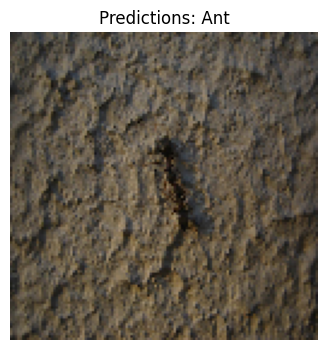

In [10]:
test1 = r'C:\Users\admin dell\Desktop\Completed projects\Hymenoptera (Ant vs Bees)\hymenoptera\val\ants\157401988_d0564a9d02.jpg'

def testing_img(img):
    filepath = img
    img = image.load_img(filepath, target_size=(128,128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array/255
    op = ['Ant', "Bee"]

    prediction = model.predict(img_array)
    prediction_class = (prediction>0.5).astype('int8')
    prediction_class_index = prediction_class[0][0]
    prediction_class_labels = op[prediction_class_index]

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title(f"Predictions: {prediction_class_labels}")
    plt.axis('off')
    plt.show()


testing_img(test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


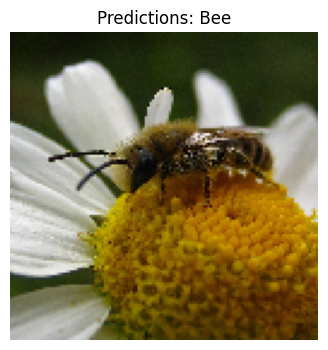

In [11]:
test2 = r'C:\Users\admin dell\Desktop\Completed projects\Hymenoptera (Ant vs Bees)\hymenoptera\val\bees\187130242_4593a4c610.jpg'
testing_img(test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


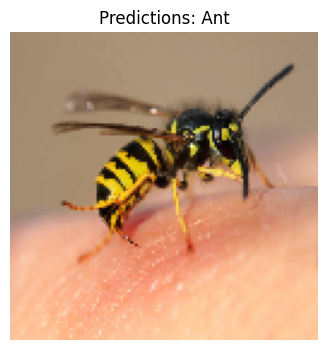

In [12]:
test3 = r'C:\Users\admin dell\Desktop\sample.jpg'
testing_img(test3)

In [13]:
from tensorflow.keras.models import load_model
model = load_model('hymen.h5', compile=False)
